In [58]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [59]:
#import Spain and US data
spain_df= pd.read_excel("data/Spain_Bretton_Woods_Data.xlsx", header = 1)
us_df = pd.read_excel("data/US_Bretton_Woods_Data.xlsx", header = 1)

In [60]:
#shorten column names and differentiate US data from Spain data
spain_df=spain_df.rename(columns={'Unnamed: 0':'Month','Economic Activity, Industrial Production, Index': 'Industrial_Production', 'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate':'Nom_Exchange_Rate', 'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':
                      'Spain_International_Reserves', 'Prices, Consumer Price Index, All items, Index':'Spain_CPI'})
us_df=us_df.rename(columns={'Unnamed: 0':'Month', 'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':
                      'US_International_Reserves', 'Prices, Consumer Price Index, All items, Index':'US_CPI'})

In [61]:
#merge Spain and US dataframes using month as key
sp_us_df=pd.merge(spain_df, us_df, on='Month')

In [62]:
sp_us_df.iloc[-10:]

,Month,Industrial_Production,Nom_Exchange_Rate,Spain_International_Reserves,Spain_CPI,US_International_Reserves,US_CPI
362,Mar 1990,103.545654,109.357,46425.022504,51.014165,76303.028540,59.021671
363,Apr 1990,91.684970,107.114,46983.663936,51.130082,76283.210610,59.113391
364,May 1990,102.227800,103.859,47767.633818,51.126023,77028.366838,59.250971
365,Jun 1990,102.227800,103.964,48454.310951,51.283673,77298.843254,59.571990
366,Jul 1990,99.592093,100.556,52775.748641,51.972801,77906.286647,59.801289
367,Aug 1990,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608
368,Sep 1990,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066
369,Oct 1990,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946
370,Nov 1990,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525
371,Dec 1990,88.202071,95.234,56004.835968,53.295997,83316.214608,61.360525


In [63]:
#change date format from string to datetime

dict={'Jan': 1,
      'Feb': 2,
      'Mar': 3,
      'Apr': 4,
      'May': 5,
      'Jun': 6,
      'Jul': 7,
      'Aug': 8,
      'Sep': 9,
      'Oct': 10,
      'Nov': 11,
      'Dec': 12}

months=[]

for i in range(len(sp_us_df)):
    str_month=sp_us_df['Month'][i].split(" ")[0]
    month=dict[str_month]
    year=int(sp_us_df['Month'][i].split(" ")[1])
    months.append(datetime.datetime(year, month, 1))

sp_us_df['Month']=months


In [64]:
#The monthly growth in the nominal exchange rate
sp_us_df['Nom_Exchange_Rate_Growth']=sp_us_df['Nom_Exchange_Rate'].pct_change()

#The real exchange rate
#Since the nominal exchange rate is in terms of US dollar, we divide by the CPI of Spain and multiply by the CPI of the US
sp_us_df['Real_Exchange_Rate']=sp_us_df['Nom_Exchange_Rate']*sp_us_df['US_CPI']/sp_us_df['Spain_CPI']

#The monthly growth in the real exchange rate
sp_us_df['Real_Exchange_Rate_Growth']=sp_us_df['Real_Exchange_Rate'].pct_change()

#The monthly inflation rate of Spain
sp_us_df['Spain_Inflation_Rate']=sp_us_df['Spain_CPI'].pct_change()

In [65]:
#The monthly growth in industrial production
sp_us_df['Industrial_Production_Monthly_Growth']=sp_us_df['Industrial_Production'].pct_change()

#The growth in industrial production versus 12 months ago
sp_us_df['Industrial_Production_Yearly_Growth']=sp_us_df['Industrial_Production'].pct_change(periods=12)

#An index of the value of Spain's international reserves (value of reserves at January 1960 = 100))
sp_us_df['Spain_International_Reserves_Index']=sp_us_df['Spain_International_Reserves']/sp_us_df['Spain_International_Reserves'][0]*100


In [66]:
#The monthly inflation rate of the US
sp_us_df['US_Inflation_Rate']=sp_us_df['US_CPI'].pct_change()

#An index of the value of the US's international reserves(value of reserves at January 1960 = 100))
sp_us_df['US_International_Reserves_Index']=sp_us_df['US_International_Reserves']/sp_us_df['US_International_Reserves'][0]*100

In [67]:
sp_us_df.head(15)

,Month,Industrial_Production,Nom_Exchange_Rate,Spain_International_Reserves,Spain_CPI,US_International_Reserves,US_CPI,Nom_Exchange_Rate_Growth,Real_Exchange_Rate,Real_Exchange_Rate_Growth,Spain_Inflation_Rate,Industrial_Production_Monthly_Growth,Industrial_Production_Yearly_Growth,Spain_International_Reserves_Index,US_Inflation_Rate,US_International_Reserves_Index
0,1960-01-01,NaN,60.0,233.00,2.857368,21478.1,13.436946,NaN,282.153680,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000
1,1960-02-01,NaN,60.0,253.00,2.855049,21395.7,13.482806,0.0,283.346534,0.004228,-0.000811,NaN,NaN,108.583691,0.003413,99.616353
2,1960-03-01,NaN,60.0,299.00,2.851573,21344.7,13.482806,0.0,283.691987,0.001219,-0.001218,NaN,NaN,128.326180,0.000000,99.378902
3,1960-04-01,NaN,60.0,326.00,2.853891,21278.0,13.528666,0.0,284.425709,0.002586,0.000813,NaN,NaN,139.914163,0.003401,99.068353
4,1960-05-01,NaN,60.0,360.00,2.845198,21234.3,13.528666,0.0,285.294743,0.003055,-0.003046,NaN,NaN,154.506438,0.000000,98.864890
5,1960-06-01,NaN,60.0,406.00,2.842878,21169.8,13.574526,0.0,286.495380,0.004208,-0.000815,NaN,NaN,174.248927,0.003390,98.564584
6,1960-07-01,NaN,60.0,427.00,2.841719,20999.4,13.574526,0.0,286.612290,0.000408,-0.000408,NaN,NaN,183.261803,0.000000,97.771218
7,1960-08-01,NaN,60.0,455.00,2.847516,20803.4,13.574526,0.0,286.028803,-0.002036,0.002040,NaN,NaN,195.278970,0.000000,96.858661
8,1960-09-01,NaN,60.0,479.00,2.864902,20430.0,13.574526,0.0,284.292960,-0.006069,0.006106,NaN,NaN,205.579399,0.000000,95.120146
9,1960-10-01,NaN,60.0,527.00,2.872438,20068.2,13.666246,0.0,285.462974,0.004116,0.002630,NaN,NaN,226.180258,0.006757,93.435639


<function matplotlib.pyplot.show(close=None, block=None)>

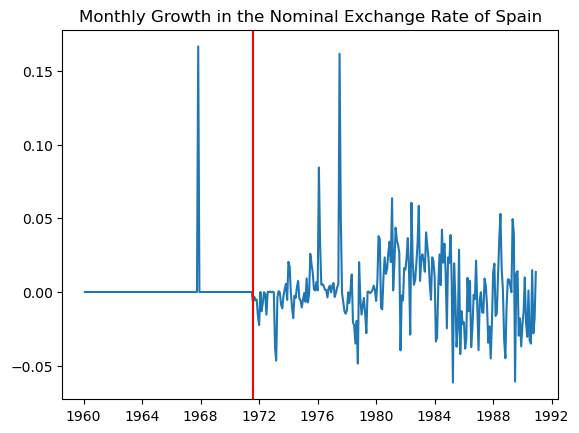

In [68]:
plt.plot(sp_us_df['Month'], sp_us_df['Nom_Exchange_Rate_Growth'])
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Monthly Growth in the Nominal Exchange Rate of Spain')
plt.savefig('figures/Monthly_Growth_in_Nom_Exchange_Rate.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

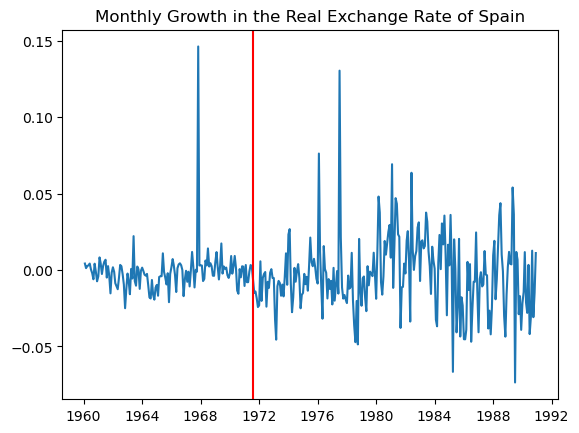

In [69]:
plt.plot(sp_us_df['Month'], sp_us_df['Real_Exchange_Rate_Growth'])
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Monthly Growth in the Real Exchange Rate of Spain')
plt.savefig('figures/Monthly_Growth_in_Real_Exchange_Rate.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

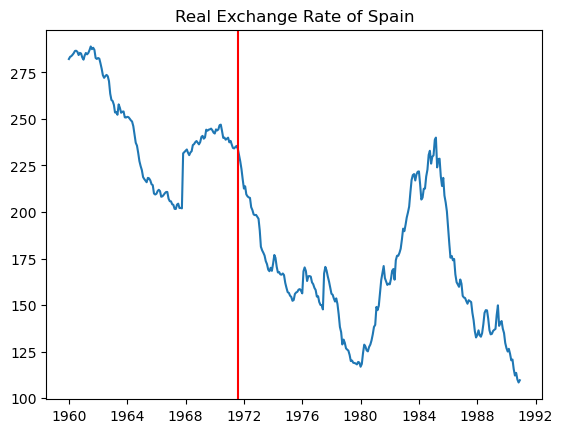

In [70]:
plt.plot(sp_us_df['Month'], sp_us_df['Real_Exchange_Rate'])
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Real Exchange Rate of Spain')
plt.savefig('figures/Real_Exchange_Rate.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

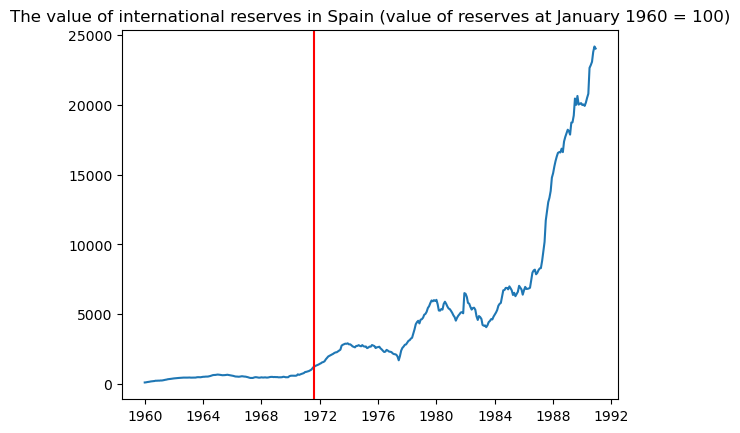

In [71]:
plt.plot(sp_us_df['Month'], sp_us_df['Spain_International_Reserves_Index'])
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('The value of international reserves in Spain (value of reserves at January 1960 = 100)')
plt.savefig('figures/Spain_International_Reserves_Index.pdf')
plt.show

In [72]:
sp_us_df.iloc[135:145]

,Month,Industrial_Production,Nom_Exchange_Rate,Spain_International_Reserves,Spain_CPI,US_International_Reserves,US_CPI,Nom_Exchange_Rate_Growth,Real_Exchange_Rate,Real_Exchange_Rate_Growth,Spain_Inflation_Rate,Industrial_Production_Monthly_Growth,Industrial_Production_Yearly_Growth,Spain_International_Reserves_Index,US_Inflation_Rate,US_International_Reserves_Index
135,1971-04-01,51.600221,70.000,2132.520000,5.491595,14307.130000,18.389814,0.000000,234.410388,-0.007975,0.010559,-0.029126,0.003421,915.244635,0.002500,66.612643
136,1971-05-01,52.315587,70.000,2240.520000,5.525211,13810.510000,18.481533,0.000000,234.146246,-0.001127,0.006121,0.013864,0.068247,961.596567,0.004988,64.300427
137,1971-06-01,53.218591,70.000,2357.520000,5.548394,13503.910000,18.619113,0.000000,234.903629,0.003235,0.004196,0.017261,0.072306,1011.811159,0.007444,62.872926
138,1971-07-01,52.198314,70.000,2579.520000,5.548394,13282.510000,18.664973,0.000000,235.482210,0.002463,0.000000,-0.019171,0.079030,1107.090129,0.002463,61.842109
139,1971-08-01,41.678906,69.504,2824.520000,5.558247,12127.810000,18.710833,-0.007086,233.972642,-0.006411,0.001776,-0.201528,0.082546,1212.240343,0.002457,56.465935
140,1971-09-01,51.658857,69.278,2947.520000,5.624321,12130.210000,18.710833,-0.003252,230.472116,-0.014961,0.011888,0.239449,0.078599,1265.030043,0.000000,56.477109
141,1971-10-01,52.913681,68.889,3053.520000,5.686336,12145.900000,18.756693,-0.005615,227.234156,-0.014049,0.011026,0.024291,0.066163,1310.523605,0.002451,56.550160
142,1971-11-01,54.649325,68.535,3135.530000,5.763421,12130.300000,18.756693,-0.005139,223.042858,-0.018445,0.013556,0.032801,0.067828,1345.721030,0.000000,56.477528
143,1971-12-01,54.414778,67.418,3224.861734,5.838768,12314.565226,18.848412,-0.016298,217.635325,-0.024244,0.013073,-0.004292,0.105815,1384.060830,0.004890,57.335450
144,1972-01-01,56.384968,65.908,3348.320721,5.843405,13084.030294,18.848412,-0.022398,212.592013,-0.023173,0.000794,0.036207,0.144489,1437.047520,0.000000,60.918006


<function matplotlib.pyplot.show(close=None, block=None)>

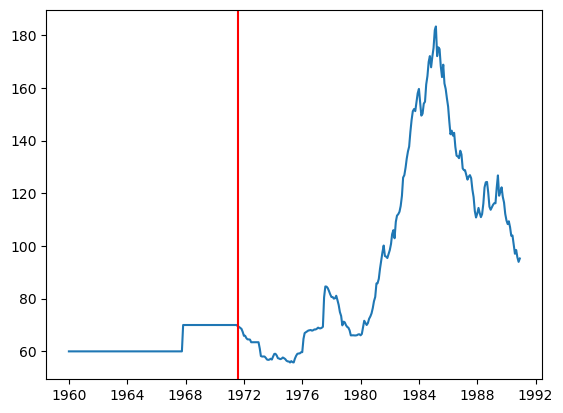

In [73]:
plt.plot(sp_us_df['Month'], sp_us_df['Nom_Exchange_Rate'])
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.show